# Recursion
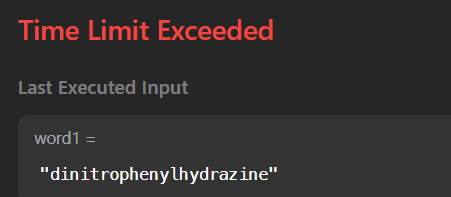

In [1]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        return self.helper(word1, word2, 0 , 0)

    def helper(self, word1, word2, i, j):
        w2  = len(word2)
        w1 = len(word1)

        if j == w2:
            return w1 - i

        if i == w1:
            return w2 - j

        if word1[i] == word2[j]:
            return self.helper(word1, word2, i + 1, j + 1 )

        # deletions
        c1 = 1 + self.helper(word1, word2, i + 1, j )
        # insertions
        c2 = 1 + self.helper(word1, word2, i, j + 1)
        # replacements
        c3 = 1 + self.helper(word1, word2, i + 1, j + 1)

        return min(c1, min(c2, c3))

## Top Down 
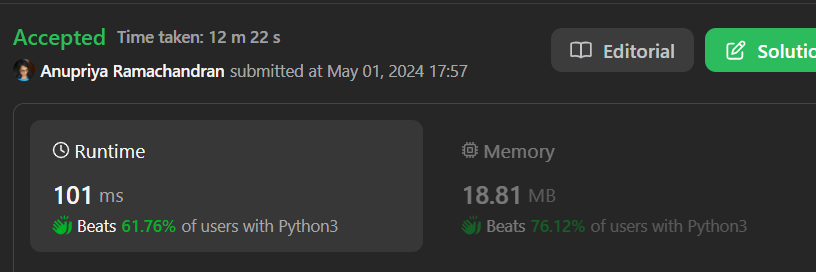

In [6]:
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        dp = [[-1 for _ in range(len(word2)) ]for _ in range(len(word1))]
        return self.helper(dp, word1, word2, 0 , 0)

    def helper(self, dp, word1, word2, i, j):
        w2  = len(word2)
        w1 = len(word1)       

        if j == w2:
            return w1 - i 

        if i == w1:
            return w2 - j
        
        if dp[i][j] == -1:

            if word1[i] == word2[j]:
                return self.helper(dp, word1, word2, i + 1, j + 1 )

            # deletions
            c1 = 1 + self.helper(dp, word1, word2, i + 1, j )
            # insertions
            c2 = 1 + self.helper(dp, word1, word2, i, j + 1)
            # replacements
            c3 = 1 + self.helper(dp, word1, word2, i + 1, j + 1)
            
            dp[i][j] = min(c1, min(c2, c3))
        return dp[i][j] 

In [7]:
word1 = "intention"
word2 = "execution"
sol = Solution()
sol.minDistance(word1, word2)

5

## Bottom up
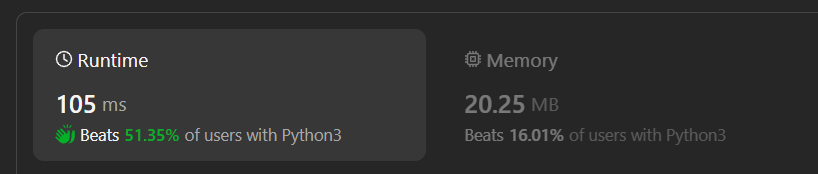

In [8]:
import math
class Solution:
    def minDistance(self, word1: str, word2: str) -> int:
        w1 = len(word1)
        w2 = len(word2)

        dp = [[math.inf for _ in range(len(word2) + 1) ]for _ in range(len(word1) + 1)]

        for i in range(w1 +1):
            dp[i][w2] =  w1 - i  #This corresponds to line number 10 if j == w2: return w1 - i 

        for j in range(w2 +1):
            dp[w1][j] =  w2 - j    #This corresponds to line number 13 if i == w1: return w2 - j

        # Rest of the operations remains when we invert the indexes, there it wwas 0 to n , here its backward 
        for i in range(w1 -1, -1, -1):
            for j in range(w2 - 1, -1, -1):
                if word1[i] == word2[j]:
                    dp[i][j] = dp[i+1][j+1]
                else:
                    # deletions
                    c1 = 1 + dp[i+1][j]
                    # insertions
                    c2 = 1 + dp[i][j+1]
                    # replacements
                    c3 = 1 + dp[i+1][j+1]
                    dp[i][j] = min(c1, c2, c3)

        return dp[0][0]